In [1]:
import  numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from  sklearn.linear_model import  SGDRegressor #Stochastic Gradient Descent Regressor
from  sklearn.preprocessing import  PolynomialFeatures
import outilsReg as reg
from numpy import random as rd

Using TensorFlow backend.


In [2]:
    #matplotlib inline 
    #df = pd.DataFrame(erreurGeneralisation[0], columns=['Dist', 'RL', 'TREE', 'BG', 'MLP', 'ST'])
    #df.boxplot()

In [3]:
base=pd.read_csv("data.csv", header=0, decimal=".", index_col=0)

In [4]:
base.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.41000,41.020000,1394.590000
2,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.25000,127.560000,1955.950000
3,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.87000,218.590000,6167.510000
4,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,225.0,1301.78,716.0,4142.56,47.0,271.93,1.318981,41.68308,306.640000,6135.400582
5,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.05000,829.026006,9988.790000
6,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.000000,88.72000,442.950000,6867.420000
7,28700,2.60,1.60,96.57,1.47,1.10,11.17,27.41,12.76,14.42,...,110.0,372.09,288.0,974.19,144.0,487.10,17.000000,57.50000,226.630000,1890.880000
8,59459,2.45,14.20,84.87,0.40,0.63,15.31,27.93,14.78,14.60,...,608.0,997.60,2250.0,3691.79,125.0,205.10,9.000000,14.77000,439.730000,4909.260000
9,74111,2.46,0.35,97.11,1.25,0.73,16.64,35.16,20.33,8.58,...,425.0,532.66,3149.0,3946.71,206.0,258.18,8.000000,10.03000,115.310000,4747.580000
10,103590,2.62,23.14,67.60,0.92,16.35,19.88,34.55,21.62,13.12,...,2397.0,2221.81,6121.0,5673.63,1070.0,991.80,18.000000,16.68000,1544.240000,8903.930000


In [5]:
boolViolence = (base.columns == 'ViolentCrimesPerPop')
boolPred = (base.columns != 'ViolentCrimesPerPop')

In [6]:
boolViolence

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
yVar = base.loc[:, boolViolence].values

In [8]:
yVar

array([[ 41.02],
       [127.56],
       [218.59],
       ...,
       [353.83],
       [691.17],
       [918.89]])

In [9]:
XVar = base.loc[:, boolPred].values

In [10]:
XVar.shape

(2215, 141)

In [11]:
echanTrain = rd.choice([0,1],size=XVar.shape[0], replace=True, p= [0.3, 0.7])

In [12]:
#theta = rd.randn(1+XVar.shape[1])

### Phase d'entrainement


In [13]:
modele = reg.modelisation(yVar[echanTrain==1,:], XVar[echanTrain==1,:])

In [14]:
yVar[echanTrain==1,:]

array([[ 41.02],
       [306.64],
       [442.95],
       ...,
       [545.75],
       [353.83],
       [691.17]])

In [15]:
modele.fit(10)

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1544/1544 [==============================] - 0s 57us/step - loss: 1530295139927.5442
Epoch 2/20
1544/1544 [==============================] - 0s 8us/step - loss: 461625234511.5854
Epoch 3/20
1544/1544 [==============================] - 0s 8us/step - loss: 104056480168.4560
Epoch 4/20
1544/1544 [==============================] - 0s 8us/step - loss: 92557904094.8394
Epoch 5/20
1544/1544 [==============================] - 0s 8us/step - loss: 33315005254.3005
Epoch 6/20
1544/1544 [==============================] - 0s 8us/step - loss: 13285499068.3523
Epoch 7/20
1544/1544 [==============================] - 0s 9us/step - loss: 14925135173.6373
Epoch 8/20
1544/1544 [==============================] - 0s 8us/step - loss: 4141917243.3575
Epoch 9/20
1544/1544 [==============================] - 0s 8us/step - loss: 3621729437.1813
Epoch 10/20
1544/1544 [==============================] - 0s 8us/step - loss: 2095834617.0363
Epoch 11/20
1544/1544 [==============================] - 0s 8us/ste

(array([563.5638105, 600.9459565]),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False),
 <keras.callbacks.callbacks.History at 0x7fd894721fd0>)

In [16]:
modele.predict(XVar[echanTrain==0,:])

(array([ 9.67729868e+02,  4.47025025e+02,  1.56175568e+02, -1.93034653e+01,
         5.05892294e+02, -4.61931940e+02,  8.52493274e+02,  3.72429769e+02,
         6.86813447e+02,  3.53741311e+02,  4.25375775e+02,  3.28125653e+02,
         1.56804634e+03,  3.90013104e+02,  4.64521628e+02, -2.87585251e+02,
         9.55727664e+02,  4.44938714e+01,  8.05006404e+01,  7.73349143e+02,
         6.75000169e+02,  1.21465876e+03,  1.23500108e+03,  2.41470007e+02,
        -3.49075226e+02,  1.06960297e+03,  6.47949654e+02,  1.00711518e+03,
         8.92513724e+02,  1.22842124e+03,  4.73949396e+01, -1.51174616e+02,
         6.54470996e+02,  6.84673943e+02, -6.47547556e+01,  9.93713032e+02,
         6.32217488e+02, -4.95300599e+02,  1.43013911e+01,  1.08991083e+03,
         1.22105704e+01,  3.09000043e+02,  9.88304792e+02,  1.36914978e+02,
         8.29070185e+02,  1.07159230e+03,  4.83915324e+01,  1.12772136e+03,
         1.45894789e+03,  6.37237594e+02,  1.37407602e+03,  3.99262511e+02,
         1.0

In [17]:
modele.evaluation(XVar[echanTrain==0,:], yVar[echanTrain==0,:])

(728571.8247322917,
 13509.63071066482,
 771751.5982989216,
 751278.1038710405,
 310631575.73486346,
 12374413.567486657)

In [18]:
modele.cross_val(10, 10)

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1385/1385 [==============================] - 0s 59us/step - loss: 20022607984144.6367
Epoch 2/20
1385/1385 [==============================] - 0s 8us/step - loss: 15456941500408.6055
Epoch 3/20
1385/1385 [==============================] - 0s 8us/step - loss: 13710490611726.7871
Epoch 4/20
1385/1385 [==============================] - 0s 8us/step - loss: 10825088592574.3828
Epoch 5/20
1385/1385 [==============================] - 0s 8us/step - loss: 8374614084079.3643
Epoch 6/20
1385/1385 [==============================] - 0s 8us/step - loss: 5778876227376.9824
Epoch 7/20
1385/1385 [==============================] - 0s 8us/step - loss: 4660182569891.5811
Epoch 8/20
1385/1385 [==============================] - 0s 8us/step - loss: 3713010260626.0215
Epoch 9/20
1385/1385 [==============================] - 0s 8us/step - loss: 2898755741984.3467
Epoch 10/20
1385/1385 [==============================] - 0s 8us/step - loss: 2157266582428.1880
Epoch 11/20
1385/1385 [=====================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1386/1386 [==============================] - 0s 59us/step - loss: 10300867527814.4648
Epoch 2/20
1386/1386 [==============================] - 0s 8us/step - loss: 8002094422420.8711
Epoch 3/20
1386/1386 [==============================] - 0s 8us/step - loss: 6228934854972.2139
Epoch 4/20
1386/1386 [==============================] - 0s 8us/step - loss: 3950386454327.0420
Epoch 5/20
1386/1386 [==============================] - 0s 8us/step - loss: 2981333708427.6362
Epoch 6/20
1386/1386 [==============================] - 0s 8us/step - loss: 2118544341479.6189
Epoch 7/20
1386/1386 [==============================] - 0s 8us/step - loss: 1281545997809.9624
Epoch 8/20
1386/1386 [==============================] - 0s 8us/step - loss: 828701571482.7821
Epoch 9/20
1386/1386 [==============================] - 0s 8us/step - loss: 521344818656.2309
Epoch 10/20
1386/1386 [==============================] - 0s 8us/step - loss: 212878458141.1833
Epoch 11/20
1386/1386 [===========================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1381/1381 [==============================] - 0s 58us/step - loss: 19318897496867.7773
Epoch 2/20
1381/1381 [==============================] - 0s 8us/step - loss: 11616757039851.4238
Epoch 3/20
1381/1381 [==============================] - 0s 9us/step - loss: 7864745369072.0576
Epoch 4/20
1381/1381 [==============================] - 0s 8us/step - loss: 5307323125466.3691
Epoch 5/20
1381/1381 [==============================] - 0s 9us/step - loss: 3206727117783.2178
Epoch 6/20
1381/1381 [==============================] - 0s 8us/step - loss: 1551005902846.5168
Epoch 7/20
1381/1381 [==============================] - 0s 8us/step - loss: 871773845643.4004
Epoch 8/20
1381/1381 [==============================] - 0s 8us/step - loss: 420636468292.9587
Epoch 9/20
1381/1381 [==============================] - 0s 8us/step - loss: 75829850224.7067
Epoch 10/20
1381/1381 [==============================] - 0s 8us/step - loss: 19468904239.2701
Epoch 11/20
1381/1381 [=============================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1388/1388 [==============================] - 0s 58us/step - loss: 5577442910656.5537
Epoch 2/20
1388/1388 [==============================] - 0s 8us/step - loss: 1657451972826.3748
Epoch 3/20
1388/1388 [==============================] - 0s 9us/step - loss: 735166592805.6254
Epoch 4/20
1388/1388 [==============================] - 0s 9us/step - loss: 399031270762.9741
Epoch 5/20
1388/1388 [==============================] - 0s 9us/step - loss: 320996967533.1873
Epoch 6/20
1388/1388 [==============================] - 0s 8us/step - loss: 190768423879.9308
Epoch 7/20
1388/1388 [==============================] - 0s 8us/step - loss: 86799678579.0893
Epoch 8/20
1388/1388 [==============================] - 0s 8us/step - loss: 59939380527.9539
Epoch 9/20
1388/1388 [==============================] - 0s 8us/step - loss: 29455203136.1844
Epoch 10/20
1388/1388 [==============================] - 0s 9us/step - loss: 13390721924.0576
Epoch 11/20
1388/1388 [==============================] - 0s 

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1407/1407 [==============================] - 0s 56us/step - loss: 163861806587630.3438
Epoch 2/20
1407/1407 [==============================] - 0s 9us/step - loss: 144630508793189.3438
Epoch 3/20
1407/1407 [==============================] - 0s 9us/step - loss: 120741142039996.6719
Epoch 4/20
1407/1407 [==============================] - 0s 9us/step - loss: 98731637835754.1562
Epoch 5/20
1407/1407 [==============================] - 0s 9us/step - loss: 83010274939371.9844
Epoch 6/20
1407/1407 [==============================] - 0s 9us/step - loss: 67756424672894.2656
Epoch 7/20
1407/1407 [==============================] - 0s 9us/step - loss: 55556618511202.3203
Epoch 8/20
1407/1407 [==============================] - 0s 9us/step - loss: 45959265497280.0469
Epoch 9/20
1407/1407 [==============================] - 0s 8us/step - loss: 35613358777874.5547
Epoch 10/20
1407/1407 [==============================] - 0s 8us/step - loss: 29514367281368.8828
Epoch 11/20
1407/1407 [============

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1374/1374 [==============================] - 0s 56us/step - loss: 64922332695.1033
Epoch 2/20
1374/1374 [==============================] - 0s 8us/step - loss: 3894508233.2227
Epoch 3/20
1374/1374 [==============================] - 0s 8us/step - loss: 12250707983.6507
Epoch 4/20
1374/1374 [==============================] - 0s 8us/step - loss: 9197302352.9549
Epoch 5/20
1374/1374 [==============================] - 0s 8us/step - loss: 6270810857.2693
Epoch 6/20
1374/1374 [==============================] - 0s 8us/step - loss: 13958935261.3450
Epoch 7/20
1374/1374 [==============================] - 0s 8us/step - loss: 6151859400.4774
Epoch 8/20
1374/1374 [==============================] - 0s 9us/step - loss: 1891008632.3610
Epoch 9/20
1374/1374 [==============================] - 0s 8us/step - loss: 14270143027.3304
Epoch 10/20
1374/1374 [==============================] - 0s 8us/step - loss: 27439213670.0087
Epoch 11/20
1374/1374 [==============================] - 0s 8us/step - lo

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1392/1392 [==============================] - 0s 59us/step - loss: 74070353742412.5000
Epoch 2/20
1392/1392 [==============================] - 0s 8us/step - loss: 58734899622970.8516
Epoch 3/20
1392/1392 [==============================] - 0s 9us/step - loss: 42343711806240.3672
Epoch 4/20
1392/1392 [==============================] - 0s 9us/step - loss: 32563551697060.7812
Epoch 5/20
1392/1392 [==============================] - 0s 8us/step - loss: 22459836105833.9336
Epoch 6/20
1392/1392 [==============================] - 0s 8us/step - loss: 16300360927443.8613
Epoch 7/20
1392/1392 [==============================] - 0s 8us/step - loss: 10723284715355.2188
Epoch 8/20
1392/1392 [==============================] - 0s 8us/step - loss: 7321618197539.3105
Epoch 9/20
1392/1392 [==============================] - 0s 8us/step - loss: 5003039922623.2646
Epoch 10/20
1392/1392 [==============================] - 0s 8us/step - loss: 2530022269587.1265
Epoch 11/20
1392/1392 [==================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1407/1407 [==============================] - 0s 55us/step - loss: 51866829880808.3516
Epoch 2/20
1407/1407 [==============================] - 0s 9us/step - loss: 43370476028614.3281
Epoch 3/20
1407/1407 [==============================] - 0s 9us/step - loss: 33801087967761.8320
Epoch 4/20
1407/1407 [==============================] - 0s 9us/step - loss: 24953403427388.0430
Epoch 5/20
1407/1407 [==============================] - 0s 8us/step - loss: 19304163487310.2383
Epoch 6/20
1407/1407 [==============================] - 0s 8us/step - loss: 12928060180597.9004
Epoch 7/20
1407/1407 [==============================] - 0s 8us/step - loss: 8932475986007.3359
Epoch 8/20
1407/1407 [==============================] - 0s 9us/step - loss: 4906942432512.9092
Epoch 9/20
1407/1407 [==============================] - 0s 9us/step - loss: 3431933203162.7007
Epoch 10/20
1407/1407 [==============================] - 0s 9us/step - loss: 1778556198584.4946
Epoch 11/20
1407/1407 [===================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1383/1383 [==============================] - 0s 56us/step - loss: 12789865781.8655
Epoch 2/20
1383/1383 [==============================] - 0s 8us/step - loss: 25649081820.2748
Epoch 3/20
1383/1383 [==============================] - 0s 8us/step - loss: 50008482563.0542
Epoch 4/20
1383/1383 [==============================] - 0s 8us/step - loss: 35188883049.8800
Epoch 5/20
1383/1383 [==============================] - 0s 8us/step - loss: 8726841132.7954
Epoch 6/20
1383/1383 [==============================] - 0s 8us/step - loss: 84366061080.8040
Epoch 7/20
1383/1383 [==============================] - 0s 8us/step - loss: 11494128832.5090
Epoch 8/20
1383/1383 [==============================] - 0s 8us/step - loss: 7922806427.1410
Epoch 9/20
1383/1383 [==============================] - 0s 8us/step - loss: 2653346937.8915
Epoch 10/20
1383/1383 [==============================] - 0s 8us/step - loss: 1212550250.4931
Epoch 11/20
1383/1383 [==============================] - 0s 8us/step - l

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1393/1393 [==============================] - 0s 58us/step - loss: 7574254914216.7061
Epoch 2/20
1393/1393 [==============================] - 0s 8us/step - loss: 4683000928639.7246
Epoch 3/20
1393/1393 [==============================] - 0s 8us/step - loss: 2011445859289.0393
Epoch 4/20
1393/1393 [==============================] - 0s 8us/step - loss: 1167143097669.6511
Epoch 5/20
1393/1393 [==============================] - 0s 8us/step - loss: 852188254828.4279
Epoch 6/20
1393/1393 [==============================] - 0s 8us/step - loss: 751443122689.1027
Epoch 7/20
1393/1393 [==============================] - 0s 8us/step - loss: 555943210081.7688
Epoch 8/20
1393/1393 [==============================] - 0s 8us/step - loss: 385292823473.3439
Epoch 9/20
1393/1393 [==============================] - 0s 8us/step - loss: 274468188233.5104
Epoch 10/20
1393/1393 [==============================] - 0s 8us/step - loss: 200815010703.5291
Epoch 11/20
1393/1393 [==============================]

(array([[7.34058325e+05, 1.29018269e+04, 6.89374086e+05, 6.94221153e+05,
         2.05733900e+09, 8.40760344e+07],
        [8.10181242e+05, 3.31749632e+04, 8.64613401e+05, 8.42518488e+05,
         1.79765977e+10, 7.17931235e+08],
        [6.81494394e+05, 1.46746722e+04, 5.97505121e+05, 6.26434522e+05,
         3.16341931e+09, 1.29755057e+08],
        [7.36436736e+05, 2.98486197e+04, 7.96694503e+05, 7.48199777e+05,
         5.36826307e+08, 2.08542927e+07],
        [6.87824148e+05, 5.91837671e+04, 6.09204777e+05, 6.42870078e+05,
         2.64850906e+10, 1.06723053e+09],
        [8.71389882e+05, 4.79158930e+04, 9.66806666e+05, 8.91961428e+05,
         8.21711133e+07, 4.27452273e+06],
        [6.55658499e+05, 1.34988516e+04, 7.04925695e+05, 6.37073758e+05,
         4.28785926e+10, 1.71518486e+09],
        [6.40314793e+05, 1.15161036e+04, 6.76363633e+05, 6.92087623e+05,
         9.82588151e+09, 3.96481991e+08],
        [6.77075119e+05, 7.90940209e+03, 5.32666335e+05, 5.37778002e+05,
       

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1389/1389 [==============================] - 0s 55us/step - loss: 8714575529693.5352
Epoch 2/20
1389/1389 [==============================] - 0s 8us/step - loss: 5500952639837.4434
Epoch 3/20
1389/1389 [==============================] - 0s 8us/step - loss: 4638600025334.9688
Epoch 4/20
1389/1389 [==============================] - 0s 8us/step - loss: 3041738140177.3242
Epoch 5/20
1389/1389 [==============================] - 0s 8us/step - loss: 2280068665482.5977
Epoch 6/20
1389/1389 [==============================] - 0s 8us/step - loss: 1835549312662.7617
Epoch 7/20
1389/1389 [==============================] - 0s 8us/step - loss: 1452348820545.6128
Epoch 8/20
1389/1389 [==============================] - 0s 8us/step - loss: 1201605480244.5269
Epoch 9/20
1389/1389 [==============================] - 0s 8us/step - loss: 996461821769.1692
Epoch 10/20
1389/1389 [==============================] - 0s 8us/step - loss: 871485568335.4355
Epoch 11/20
1389/1389 [===========================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1395/1395 [==============================] - 0s 55us/step - loss: 1001161361708.9606
Epoch 2/20
1395/1395 [==============================] - 0s 8us/step - loss: 621898302144.6882
Epoch 3/20
1395/1395 [==============================] - 0s 8us/step - loss: 423410589373.0179
Epoch 4/20
1395/1395 [==============================] - 0s 8us/step - loss: 193056162878.3943
Epoch 5/20
1395/1395 [==============================] - 0s 8us/step - loss: 91998642058.5520
Epoch 6/20
1395/1395 [==============================] - 0s 8us/step - loss: 40666342833.0896
Epoch 7/20
1395/1395 [==============================] - 0s 8us/step - loss: 5033413884.3297
Epoch 8/20
1395/1395 [==============================] - 0s 8us/step - loss: 6850102254.1075
Epoch 9/20
1395/1395 [==============================] - 0s 8us/step - loss: 5828802215.4552
Epoch 10/20
1395/1395 [==============================] - 0s 8us/step - loss: 1839176059.4122
Epoch 11/20
1395/1395 [==============================] - 0s 8us/ste

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1407/1407 [==============================] - 0s 56us/step - loss: 58524737894235.5156
Epoch 2/20
1407/1407 [==============================] - 0s 9us/step - loss: 48084592456119.5859
Epoch 3/20
1407/1407 [==============================] - 0s 9us/step - loss: 37933959552936.6641
Epoch 4/20
1407/1407 [==============================] - 0s 9us/step - loss: 31735744338436.7305
Epoch 5/20
1407/1407 [==============================] - 0s 9us/step - loss: 23310408518751.3398
Epoch 6/20
1407/1407 [==============================] - 0s 9us/step - loss: 18702450984780.9648
Epoch 7/20
1407/1407 [==============================] - 0s 8us/step - loss: 16048225828188.6113
Epoch 8/20
1407/1407 [==============================] - 0s 9us/step - loss: 11755166789247.7266
Epoch 9/20
1407/1407 [==============================] - 0s 8us/step - loss: 7869373424972.5996
Epoch 10/20
1407/1407 [==============================] - 0s 9us/step - loss: 5643204451065.2676
Epoch 11/20
1407/1407 [=================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1375/1375 [==============================] - 0s 58us/step - loss: 38856131327366.9844
Epoch 2/20
1375/1375 [==============================] - 0s 8us/step - loss: 32346447849360.2891
Epoch 3/20
1375/1375 [==============================] - 0s 8us/step - loss: 24494412322331.9297
Epoch 4/20
1375/1375 [==============================] - 0s 8us/step - loss: 20955594089490.6172
Epoch 5/20
1375/1375 [==============================] - 0s 8us/step - loss: 16553356253295.7090
Epoch 6/20
1375/1375 [==============================] - 0s 8us/step - loss: 13390260913021.6719
Epoch 7/20
1375/1375 [==============================] - 0s 8us/step - loss: 10198236782443.0547
Epoch 8/20
1375/1375 [==============================] - 0s 8us/step - loss: 7950964904904.1455
Epoch 9/20
1375/1375 [==============================] - 0s 8us/step - loss: 6283463534480.2900
Epoch 10/20
1375/1375 [==============================] - 0s 8us/step - loss: 5006033625236.9453
Epoch 11/20
1375/1375 [==================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1392/1392 [==============================] - 0s 56us/step - loss: 2982537855164.3218
Epoch 2/20
1392/1392 [==============================] - 0s 8us/step - loss: 1045594970653.4253
Epoch 3/20
1392/1392 [==============================] - 0s 8us/step - loss: 384532923256.6437
Epoch 4/20
1392/1392 [==============================] - 0s 8us/step - loss: 162330206062.3448
Epoch 5/20
1392/1392 [==============================] - 0s 8us/step - loss: 16223541950.5287
Epoch 6/20
1392/1392 [==============================] - 0s 8us/step - loss: 64951353076.2299
Epoch 7/20
1392/1392 [==============================] - 0s 9us/step - loss: 56329689663.2644
Epoch 8/20
1392/1392 [==============================] - 0s 8us/step - loss: 10525811825.2874
Epoch 9/20
1392/1392 [==============================] - 0s 8us/step - loss: 2300220413.4253
Epoch 10/20
1392/1392 [==============================] - 0s 8us/step - loss: 2007422016.7356
Epoch 11/20
1392/1392 [==============================] - 0s 8us/

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1390/1390 [==============================] - 0s 59us/step - loss: 319924628778.3597
Epoch 2/20
1390/1390 [==============================] - 0s 8us/step - loss: 34315752691.1079
Epoch 3/20
1390/1390 [==============================] - 0s 8us/step - loss: 135095611907.6834
Epoch 4/20
1390/1390 [==============================] - 0s 9us/step - loss: 47297415186.4173
Epoch 5/20
1390/1390 [==============================] - 0s 9us/step - loss: 2077897608.2878
Epoch 6/20
1390/1390 [==============================] - 0s 8us/step - loss: 39002731971.2230
Epoch 7/20
1390/1390 [==============================] - 0s 8us/step - loss: 1454600339.3381
Epoch 8/20
1390/1390 [==============================] - 0s 9us/step - loss: 4015893968.1151
Epoch 9/20
1390/1390 [==============================] - 0s 9us/step - loss: 1961797648.1151
Epoch 10/20
1390/1390 [==============================] - 0s 9us/step - loss: 1676166205.3525
Epoch 11/20
1390/1390 [==============================] - 0s 9us/step - 

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1388/1388 [==============================] - 0s 60us/step - loss: 82129879735777.0156
Epoch 2/20
1388/1388 [==============================] - 0s 9us/step - loss: 73318174571269.1719
Epoch 3/20
1388/1388 [==============================] - 0s 8us/step - loss: 59051356568230.7344
Epoch 4/20
1388/1388 [==============================] - 0s 9us/step - loss: 52916096231618.7578
Epoch 5/20
1388/1388 [==============================] - 0s 8us/step - loss: 44229685694381.3672
Epoch 6/20
1388/1388 [==============================] - 0s 8us/step - loss: 34784300806415.4922
Epoch 7/20
1388/1388 [==============================] - 0s 10us/step - loss: 28899150997651.5547
Epoch 8/20
1388/1388 [==============================] - 0s 9us/step - loss: 24391380267421.1406
Epoch 9/20
1388/1388 [==============================] - 0s 8us/step - loss: 20581647020445.1406
Epoch 10/20
1388/1388 [==============================] - 0s 9us/step - loss: 15674223187348.2891
Epoch 11/20
1388/1388 [==============

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1399/1399 [==============================] - 0s 56us/step - loss: 8490372919527.2969
Epoch 2/20
1399/1399 [==============================] - 0s 8us/step - loss: 5802065930868.0146
Epoch 3/20
1399/1399 [==============================] - 0s 8us/step - loss: 3111551114581.8208
Epoch 4/20
1399/1399 [==============================] - 0s 8us/step - loss: 1306340947954.8250
Epoch 5/20
1399/1399 [==============================] - 0s 8us/step - loss: 288663620583.1136
Epoch 6/20
1399/1399 [==============================] - 0s 8us/step - loss: 77548279094.8964
Epoch 7/20
1399/1399 [==============================] - 0s 8us/step - loss: 2775319476.2430
Epoch 8/20
1399/1399 [==============================] - 0s 8us/step - loss: 9446314131.8542
Epoch 9/20
1399/1399 [==============================] - 0s 8us/step - loss: 14811535001.3438
Epoch 10/20
1399/1399 [==============================] - 0s 8us/step - loss: 13114727498.2931
Epoch 11/20
1399/1399 [==============================] - 0s 8

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1364/1364 [==============================] - 0s 57us/step - loss: 294967554444.3871
Epoch 2/20
1364/1364 [==============================] - 0s 8us/step - loss: 108394724150.8035
Epoch 3/20
1364/1364 [==============================] - 0s 8us/step - loss: 27289864676.9736
Epoch 4/20
1364/1364 [==============================] - 0s 8us/step - loss: 16941266798.3578
Epoch 5/20
1364/1364 [==============================] - 0s 8us/step - loss: 18933062646.9912
Epoch 6/20
1364/1364 [==============================] - 0s 9us/step - loss: 7484718166.3343
Epoch 7/20
1364/1364 [==============================] - 0s 8us/step - loss: 1822405039.1085
Epoch 8/20
1364/1364 [==============================] - 0s 8us/step - loss: 1460401628.7155
Epoch 9/20
1364/1364 [==============================] - 0s 8us/step - loss: 1834490694.0997
Epoch 10/20
1364/1364 [==============================] - 0s 8us/step - loss: 888549483.1672
Epoch 11/20
1364/1364 [==============================] - 0s 8us/step - l

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1397/1397 [==============================] - 0s 55us/step - loss: 1441987599955.9285
Epoch 2/20
1397/1397 [==============================] - 0s 8us/step - loss: 734981807875.8481
Epoch 3/20
1397/1397 [==============================] - 0s 9us/step - loss: 384927333019.0294
Epoch 4/20
1397/1397 [==============================] - 0s 8us/step - loss: 91834652433.0422
Epoch 5/20
1397/1397 [==============================] - 0s 8us/step - loss: 59320130337.8096
Epoch 6/20
1397/1397 [==============================] - 0s 8us/step - loss: 3992988074.2391
Epoch 7/20
1397/1397 [==============================] - 0s 8us/step - loss: 13297389819.4188
Epoch 8/20
1397/1397 [==============================] - 0s 9us/step - loss: 14771952855.1353
Epoch 9/20
1397/1397 [==============================] - 0s 8us/step - loss: 9936503255.5018
Epoch 10/20
1397/1397 [==============================] - 0s 8us/step - loss: 4975014927.3930
Epoch 11/20
1397/1397 [==============================] - 0s 8us/ste

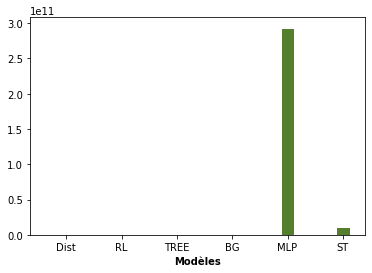

In [19]:
reg.resultat(modele, 10, 10)